# PyPortfolioOpt

Docs
- https://pypi.org/project/pyportfolioopt

In [1]:
#%pip install --upgrade numpy
#%pip install --upgrade pandas
#%pip install --upgrade matplotlib
#%pip install --upgrade yfinance
%pip install --upgrade pypfopt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pypfopt import EfficientFrontier
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt import plotting
from pypfopt import risk_models

ModuleNotFoundError: No module named 'pypfopt'

In [ ]:
# Read in price data
# df = pd.read_csv("tests/resources/stock_prices.csv", parse_dates=True, index_col="date")
# tickers = ["SPY", "EEM", "BIL", "AGG", "GLD"]
#tickers = ["SPY", "AGG", "GLD"]
tickers = ['AAPL', 'GOOG', 'MSFT', 'NVDA']
df = yf.download(tickers, period='3y')["Adj Close"].dropna(how="all")

[*********************100%***********************]  4 of 4 completed


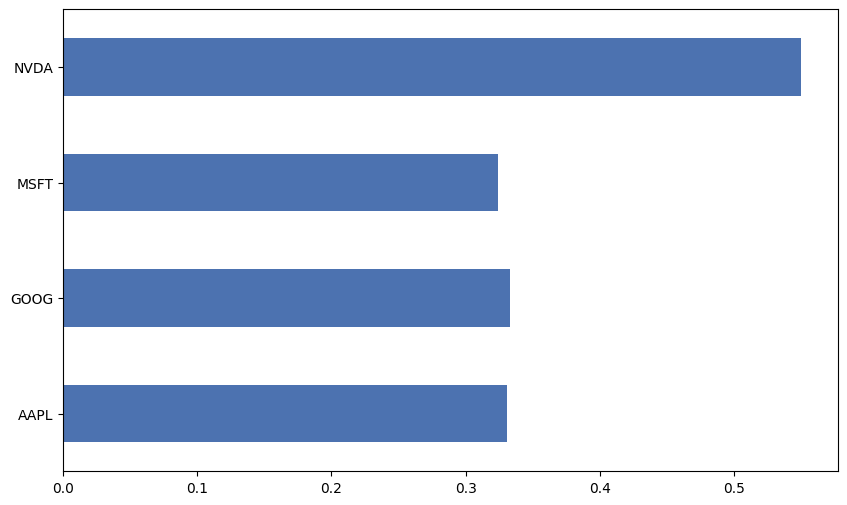

In [ ]:
# Calculate expected returns
#mu = expected_returns.mean_historical_return(df)
mu = expected_returns.capm_return(df)
mu.plot.barh(figsize=(10,6));

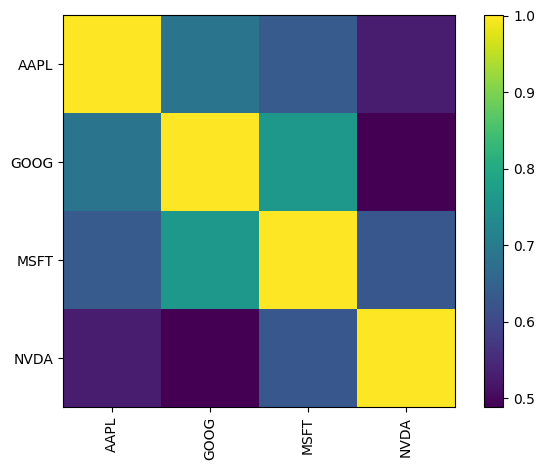

In [ ]:
# Calculate sample covariance
#S = risk_models.sample_cov(df)
S = risk_models.exp_cov(df, span=50)
#S = risk_models.CovarianceShrinkage(df).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

In [ ]:
# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S) #, verbose=True)
#ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
#ef.add_constraint(lambda w: w >= 0.1)
#ef.add_objective(objective_functions.L2_reg)

In [ ]:
ef_perf = ef.deepcopy()
raw_weights = ef_perf.max_sharpe()
cleaned_weights = ef_perf.clean_weights()
# ef_perf.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
ef_perf.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.75741), ('GOOG', 0.0), ('MSFT', 0.11225), ('NVDA', 0.13034)])
Expected annual return: 35.8%
Annual volatility: 25.3%
Sharpe Ratio: 1.34


(0.35848642218811533, 0.2533483733637137, 1.3360512944844338)

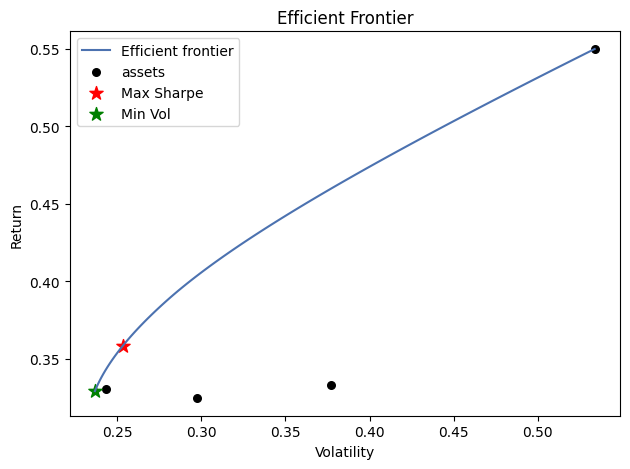

In [ ]:
fig, ax = plt.subplots()
ef_plt = ef.deepcopy()
plotting.plot_efficient_frontier(ef_plt, ax=ax, show_assets=True)

# Find the tangency portfolio
ef_max_sharpe = ef.deepcopy()
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Find GMV portfolio
ef_min_vol = ef.deepcopy()
ef_min_vol.min_volatility()
ret_min_vol, std_min_vol, _ = ef_min_vol.portfolio_performance()
ax.scatter(std_min_vol, ret_min_vol, marker="*", s=100, c="g", label="Min Vol")

# Generate random portfolios
n_samples = 0 #10000
w = np.random.dirichlet(np.ones(ef_plt.n_assets), n_samples)
rets = w.dot(ef_plt.expected_returns)
stds = np.sqrt(np.diag(w @ ef_plt.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier")
ax.legend()
plt.tight_layout()
# plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [ ]:
from pypfopt import CLA

cla = CLA(mu, S)
w = cla.max_sharpe()
print(w)
cla.portfolio_performance(verbose=True);

OrderedDict([('AAPL', 0.7539700852867783), ('GOOG', 0.0), ('MSFT', 0.13179959980733136), ('NVDA', 0.11423031490589013)])
Expected annual return: 35.5%
Annual volatility: 25.1%
Sharpe Ratio: 1.34


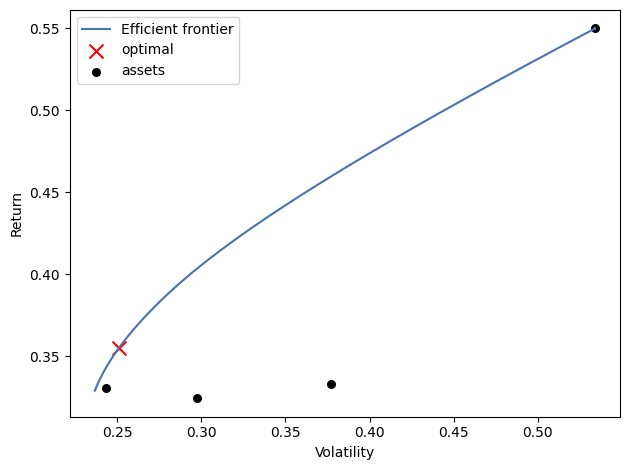

In [ ]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)